In [2]:
!pip install boto3 --upgrade
!pip install Pillow --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install scikit-learn --upgrade
!pip install psycopg2-binary --upgrade
!pip install requests --upgrade
!pip install requests_aws4auth --upgrade
!pip install pinecone-client --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 31.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 795.9 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 1.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.33.9
    Uninstalling botocore-1.33.9:
      Successfully uninstalled botocore-1.33.9
  Attempting uninstall: s3transfer
    Found existing installation: s3transfer 0.8.2
    Uninstalling s3transfer-0.8.2:
      Successfully uninstalled s3transfer-0.8.2
  Attempting uninstall: boto3
    Found existing installation: boto3 1.33.9
    Uninstalling boto3-1.33.9:
      Successfully uninstalled boto3-1.33.9
ERROR: pip's

In [3]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [4]:
import boto3

bedrock = boto3.client('bedrock')
response = bedrock.list_foundation_models()
models = response['modelSummaries']
for model in models:
    print(model['modelName'] + '\t' + model['modelId'])


Titan Text Large	amazon.titan-tg1-large
Titan Image Generator G1	amazon.titan-image-generator-v1:0
Titan Image Generator G1	amazon.titan-image-generator-v1
Titan Text Embeddings v2	amazon.titan-embed-g1-text-02
Titan Text G1 - Lite	amazon.titan-text-lite-v1:0:4k
Titan Text G1 - Lite	amazon.titan-text-lite-v1
Titan Text G1 - Express	amazon.titan-text-express-v1:0:8k
Titan Text G1 - Express	amazon.titan-text-express-v1
Titan Embeddings G1 - Text	amazon.titan-embed-text-v1:2:8k
Titan Embeddings G1 - Text	amazon.titan-embed-text-v1
Titan Multimodal Embeddings G1	amazon.titan-embed-image-v1:0
Titan Multimodal Embeddings G1	amazon.titan-embed-image-v1
SDXL 0.8	stability.stable-diffusion-xl
SDXL 0.8	stability.stable-diffusion-xl-v0
SDXL 1.0	stability.stable-diffusion-xl-v1:0
SDXL 1.0	stability.stable-diffusion-xl-v1
J2 Grande Instruct	ai21.j2-grande-instruct
J2 Jumbo Instruct	ai21.j2-jumbo-instruct
Jurassic-2 Mid	ai21.j2-mid
Jurassic-2 Mid	ai21.j2-mid-v1
Jurassic-2 Ultra	ai21.j2-ultra
Jurassi

In [10]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Explain what general relativity is to an 8 year old.
"""
input = {
    'prompt': prompt, 
    'maxTokens': 1024,
    'temperature': 0.3,
    'topP': 1.0,
    'stopSequences': [],
    'countPenalty': {'scale': 0},
    'presencePenalty': {'scale': 0},
    'frequencyPenalty': {'scale': 0}
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
#print(json.dumps(response_body, indent=2))
print(response_body['completions'][0]['data']['text']) # + '\t' + model['modelId'])

General relativity is a theory of gravity that was developed by Albert Einstein. It says that gravity is not just an invisible force that pulls things towards each other, but is actually caused by the curvature of space and time.

Imagine you have a big trampoline and you put a heavy ball on it. The ball will make a little dent in the trampoline, and that dent is like the curvature of space and time caused by the gravity of the ball.

So, according to general relativity, heavy things like planets and stars bend space and time around them, and that causes smaller things to be pulled towards them. That's why when you drop something, it falls to the ground. It's not because an invisible force is pulling it, but because the ground is bending space and time around it.


In [11]:
completions = response_body['completions']
for part in completions:
    print(part['data']['text'])

General relativity is a theory of gravity that was developed by Albert Einstein. It says that gravity is not just an invisible force that pulls things towards each other, but is actually caused by the curvature of space and time.

Imagine you have a big trampoline and you put a heavy ball on it. The ball will make a little dent in the trampoline, and that dent is like the curvature of space and time caused by the gravity of the ball.

So, according to general relativity, heavy things like planets and stars bend space and time around them, and that causes smaller things to be pulled towards them. That's why when you drop something, it falls to the ground. It's not because an invisible force is pulling it, but because the ground is bending space and time around it.


In [12]:

import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Explain what general relativity is to an 8 year old.
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 1024,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
print(json.dumps(response_body, indent=2))


{
  "inputTextTokenCount": 16,
  "results": [
    {
      "tokenCount": 66,
      "outputText": "General relativity is a very complicated and interesting part of physics. It says that gravity is not a force that pulls things together, but a way of bending space and time. It explains why things fall to the ground and why the sky looks blue. It also helps us understand things like black holes and how the universe is expanding.",
      "completionReason": "FINISH"
    }
  ]
}


In [13]:
completions = response_body['results']
for part in completions:
    print(part['outputText']) 


General relativity is a very complicated and interesting part of physics. It says that gravity is not a force that pulls things together, but a way of bending space and time. It explains why things fall to the ground and why the sky looks blue. It also helps us understand things like black holes and how the universe is expanding.


In [14]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'anthropic.claude-v2'
accept = 'application/json'
contentType = 'application/json'
prompt = """

Human: Explain what general relativity is to an 8 year old.

Assistant:
"""
input = {
    'prompt': prompt,
    'max_tokens_to_sample': 1024, 
    'temperature': 0.5,
    'top_k': 250,
    'top_p': 1,
    'stop_sequences': ['\n\nHuman:']
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
print(json.dumps(response_body, indent=2))


{
  "completion": " Okay, I'll try to explain general relativity in a simple way that an 8 year old could understand:\n\nYou know how gravity makes things fall down? Like if you drop a ball, it falls down toward the ground. General relativity explains gravity in a new way. It says that gravity is not a force that pulls things down like magnets pull on each other. Instead, gravity is caused by space and time curving or bending.\n\nImagine space is like a trampoline. If you put a heavy bowling ball in the middle of the trampoline, it sinks down and curves the fabric. Now if you roll a smaller ball across the trampoline, it will curve inward and roll toward the bowling ball. This is because the trampoline is bent by the heavy bowling ball. \n\nIn the same way, objects like the Earth and Sun curve or bend the fabric of space and time. So when something moves through curved space, it looks like it's being pulled by gravity, even though gravity isn't really a pull - it's just objects moving 

In [15]:
completions = response_body['completion']
print(completions)


 Okay, I'll try to explain general relativity in a simple way that an 8 year old could understand:

You know how gravity makes things fall down? Like if you drop a ball, it falls down toward the ground. General relativity explains gravity in a new way. It says that gravity is not a force that pulls things down like magnets pull on each other. Instead, gravity is caused by space and time curving or bending.

Imagine space is like a trampoline. If you put a heavy bowling ball in the middle of the trampoline, it sinks down and curves the fabric. Now if you roll a smaller ball across the trampoline, it will curve inward and roll toward the bowling ball. This is because the trampoline is bent by the heavy bowling ball. 

In the same way, objects like the Earth and Sun curve or bend the fabric of space and time. So when something moves through curved space, it looks like it's being pulled by gravity, even though gravity isn't really a pull - it's just objects moving through curved space-time

In [16]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'cohere.command-text-v14'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Explain what general relativity is to an 8 year old.
"""
input = {
    'prompt': prompt, 
    'max_tokens': 1024,
    'temperature': 0.5,
    'k': 500,
    'p': 1.0,
    'stop_sequences': [],
    'return_likelihoods': 'NONE'
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
print(json.dumps(response_body, indent=2))


{
  "generations": [
    {
      "finish_reason": "COMPLETE",
      "id": "6eb05747-a611-4066-a4c7-5add37a1fa74",
      "text": " General relativity is a scientific theory that explains how our universe works. It tells us about how gravity affects the world around us, and how all things in the universe are connected. It's like a big rule book that helps us understand how the stars, planets, and even light and time work.\n\nImagine you're playing with a toy car. You want to make the car go uphill, so you have to push it a little harder, right? That's a bit like gravity. It's like a force that pulls things down. When something is heavy, like a planet or a star, it pulls things towards it. That's why you stay on the ground and don't float away - the Earth's gravity is pulling you down!\n\nGeneral relativity tells us that gravity isn't just about pulling things down. It's about how everything in the universe is connected, like a big cosmic web. When something big moves or changes, it can c

In [17]:
completions = response_body['generations']
for part in completions:
    print(part['text'])


 General relativity is a scientific theory that explains how our universe works. It tells us about how gravity affects the world around us, and how all things in the universe are connected. It's like a big rule book that helps us understand how the stars, planets, and even light and time work.

Imagine you're playing with a toy car. You want to make the car go uphill, so you have to push it a little harder, right? That's a bit like gravity. It's like a force that pulls things down. When something is heavy, like a planet or a star, it pulls things towards it. That's why you stay on the ground and don't float away - the Earth's gravity is pulling you down!

General relativity tells us that gravity isn't just about pulling things down. It's about how everything in the universe is connected, like a big cosmic web. When something big moves or changes, it can cause ripples in space and time, like dropping a stone into a pond and watching the ripples spread. These ripples are called gravitati

In [18]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'meta.llama2-13b-chat-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Explain what general relativity is to an 8 year old.
"""
input = {
    'prompt': prompt,
    'max_gen_len': 512,
    'temperature': 0.5,
    'top_p': 0.9
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
print(json.dumps(response_body, indent=2))


{
  "generation": "\nHint: Think of it like a big stretchy fabric that warps and curves in response to the weight of objects on it.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

In [20]:
generation = response_body['generation']
#print(generation)


In [21]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'anthropic.claude-v2'
prompt = """

Human: explain general relativity to a university professor with 1000 words.

Assistant:
"""
input = {
    'prompt': prompt,
    'max_tokens_to_sample': 1280, 
    'temperature': 1,
    'top_k': 1,
    'top_p': 1,
    'stop_sequences': []
}
body=json.dumps(input)
response = bedrock.invoke_model_with_response_stream(
    body=body, modelId=modelId, accept=accept,contentType=contentType)
stream = response.get('body')
if stream:
    for event in stream:
        chunk = event.get('chunk')
        if chunk:
            print(json.loads(chunk.get('bytes')))


{'completion': ' Here', 'stop_reason': None, 'stop': None}
{'completion': ' is a 1000 word', 'stop_reason': None, 'stop': None}
{'completion': " explanation of general relativity for a university professor:\n\nGeneral relativity is Einstein's", 'stop_reason': None, 'stop': None}
{'completion': ' theory of gravitation, published in 1915, which', 'stop_reason': None, 'stop': None}
{'completion': ' revised Newton', 'stop_reason': None, 'stop': None}
{'completion': "'s", 'stop_reason': None, 'stop': None}
{'completion': ' theory of gravity to account', 'stop_reason': None, 'stop': None}
{'completion': ' for', 'stop_reason': None, 'stop': None}
{'completion': ' special relativity', 'stop_reason': None, 'stop': None}
{'completion': '. The key insight of', 'stop_reason': None, 'stop': None}
{'completion': ' general relativity is that gravity is not', 'stop_reason': None, 'stop': None}
{'completion': ' actually a force, but a consequence of the curvature of spacetime', 'stop_reason': None, 'st

In [22]:
import boto3

bedrock = boto3.client('bedrock')
response = bedrock.list_foundation_models()
models = response.get('modelSummaries')
for model in models:
    print('{0}\t{1}'.format(model.get('responseStreamingSupported'), model.get('modelId')))


True	amazon.titan-tg1-large
None	amazon.titan-image-generator-v1:0
None	amazon.titan-image-generator-v1
None	amazon.titan-embed-g1-text-02
True	amazon.titan-text-lite-v1:0:4k
True	amazon.titan-text-lite-v1
True	amazon.titan-text-express-v1:0:8k
True	amazon.titan-text-express-v1
False	amazon.titan-embed-text-v1:2:8k
False	amazon.titan-embed-text-v1
None	amazon.titan-embed-image-v1:0
None	amazon.titan-embed-image-v1
None	stability.stable-diffusion-xl
None	stability.stable-diffusion-xl-v0
None	stability.stable-diffusion-xl-v1:0
None	stability.stable-diffusion-xl-v1
False	ai21.j2-grande-instruct
False	ai21.j2-jumbo-instruct
False	ai21.j2-mid
False	ai21.j2-mid-v1
False	ai21.j2-ultra
False	ai21.j2-ultra-v1
True	anthropic.claude-instant-v1:2:100k
True	anthropic.claude-instant-v1
True	anthropic.claude-v1
True	anthropic.claude-v2:0:18k
True	anthropic.claude-v2:0:100k
True	anthropic.claude-v2:1:18k
True	anthropic.claude-v2:1:200k
True	anthropic.claude-v2:1
True	anthropic.claude-v2
True	cohere.co

In [23]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Meeting transcript: 
Miguel: Hi Brant, I want to discuss the workstream  for our new product launch 
Brant: Sure Miguel, is there anything in particular you want to discuss? 
Miguel: Yes, I want to talk about how users enter into the product. 
Brant: Ok, in that case let me add in Namita. 
Namita: Hey everyone 
Brant: Hi Namita, Miguel wants to discuss how users enter into the product. 
Miguel: its too complicated and we should remove friction.  for example, why do I need to fill out additional forms?  I also find it difficult to find where to access the product when I first land on the landing page. 
Brant: I would also add that I think there are too many steps. 
Namita: Ok, I can work on the landing page to make the product more discoverable but brant can you work on the additonal forms? 
Brant: Yes but I would need to work with James from another team as he needs to unblock the sign up workflow.  Miguel can you document any other concerns so that I can discuss with James only once? 
Miguel: Sure. 
From the meeting transcript above, Create a list of action items for each person. 
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])



Action items for Brant:
1. Work with James from another team to unblock the sign up workflow. 
2. Work on the additional forms. 

Action items for Miguel:
1. Document any other concerns. 
2. Discuss with James only once.


In [24]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'ai21.j2-ultra'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Meet Carbon Maps, a new French startup that raised $4.3 million (€4 million) just a few weeks after its inception. The company is building a software-as-a-service platform for the food industry so that they can track the environmental impact of each of their products in their lineup. The platform can be used as a basis for eco ratings. 

While there are quite a few carbon accounting startups like Greenly, Sweep, Persefoni and Watershed, Carbon Maps isn’t an exact competitor as it doesn’t calculate a company’s carbon emissions as a whole. It doesn’t focus on carbon emissions exclusively either. Carbon Maps focuses on the food industry and evaluates the environmental impact of products — not companies. 

Co-founded by Patrick Asdaghi, Jérémie Wainstain and Estelle Huynh, the company managed to raise a seed round with Breega and Samaipata — these two VC firms already invested in Asdaghi’s previous startup, FoodChéri. 

FoodChéri is a full-stack food delivery company that designs its own meals and sells them directly to end customers with an important focus on healthy food. It also operates Seazon, a sister company for batch deliveries. The startup was acquired by Sodexo a few years ago. 

“On the day that I left, I started working on food and health projects again,” Asdaghi told me. “I wanted to make an impact, so I started moving up the supply chain and looking at agriculture.” 

And the good news is that Asdaghi isn’t the only one looking at the supply chain of the food industry. In France, some companies started working on an eco-score with a public agency (ADEME) overseeing the project. It’s a life cycle assessment that leads to a letter rating from A to E. 

While very few brands put these letters on their labels, chances are companies that have good ratings will use the eco-score as a selling point in the coming years. 

But these ratings could become even more widespread as regulation is still evolving. The European Union is even working on a standard — the Product Environmental Footprint (PEF). European countries can then create their own scoring systems based on these European criteria, meaning that food companies will need good data on their supply chains. 

“The key element in the new eco-score that’s coming up is that there will be some differences within a product category because ingredients and farming methods are different,” Asdaghi said. “It’s going to take into consideration the carbon impact, but also biodiversity, water consumption and animal welfare.” 

For instance, when you look at ground beef, it’s extremely important to know whether farmers are using soy from Brazil or grass to feed cattle. 

“We don’t want to create the ratings. We want to create the tools that help with calculations — a sort of SAP,” Asdaghi said. 

So far, Carbon Maps is working with two companies on pilot programs as it’s going to require a ton of work to cover each vertical in the food industry. The startup creates models with as many criteria as possible to calculate the impact of each criteria. It uses data from standardized sources like GHG Protocol, IPCC, ISO 14040 and 14044. 

The company targets food brands because they design the recipes and select their suppliers. Eventually, Carbon Maps hopes that everybody across the supply chain is going to use its platform in one way or another. 

“You can’t have a true climate strategy if you don’t have some collaboration across the chain,” Asdaghi said. 

## 

Summarize the above text in 5 bullets.
"""
input = {
    'prompt':prompt, 
    'maxTokens': 200,
    'temperature': 0.3,
    'topP': 1.0,
    'stopSequences': [],
    'countPenalty': {'scale': 0},
    'presencePenalty': {'scale': 0},
    'frequencyPenalty': {'scale': 0}
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
completions = response_body['completions']
for part in completions:
    print(part['data']['text'])


- Carbon Maps is a software-as-a-service platform for the food industry to track the environmental impact of each of their products.
- The platform can be used as a basis for eco ratings.
- Carbon Maps focuses on the food industry and evaluates the environmental impact of products, not companies.
- The startup raised $4.3 million just a few weeks after its inception.
- Carbon Maps targets food brands because they design the recipes and select their suppliers.


In [25]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'anthropic.claude-v2'
prompt = """

Human: I'd like you to rewrite the following paragraph using the following instructions: "understandable to a 5th grader". 
"In 1758, the Swedish botanist and zoologist Carl Linnaeus published in his Systema Naturae, the two-word naming of species (binomial nomenclature). Canis is the Latin word meaning "dog", and under this genus, he listed the domestic dog, the wolf, and the golden jackal. "
Please put your rewrite in <rewrite></rewrite> tags.

Assistant:
"""
input = {
    'prompt': prompt,
    'max_tokens_to_sample': 2048, 
    'temperature': 0.5,
    'top_k': 250,
    'top_p': 1,
    'stop_sequences': []
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
completion = response_body['completion']
print(completion)


 <rewrite>
A long time ago in 1758, a scientist named Carl Linnaeus wrote a book called Systema Naturae. In this book, he gave animals two-word names. The first word was the group the animal belonged to. The second word was the animal's specific name. For example, he put dogs, wolves, and jackals in the group called "Canis." Canis is the Latin word for dog. Under the Canis group, he listed the domestic dog, the wolf, and the golden jackal. 
</rewrite>


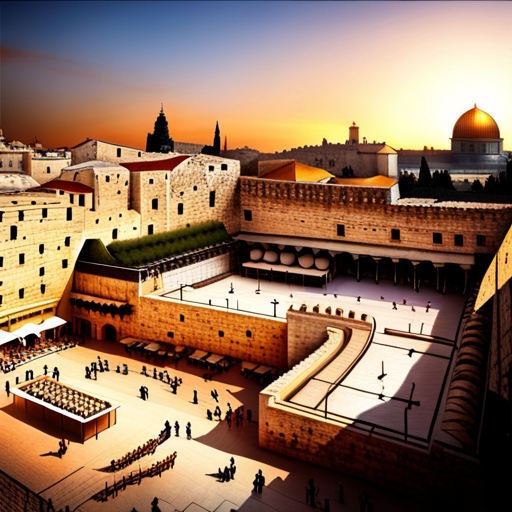

In [36]:
import json
import boto3
import uuid
from PIL import Image
from io import BytesIO
from base64 import b64encode
from base64 import b64decode
from IPython.display import display

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'stability.stable-diffusion-xl'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Western wall in Israel as it looked like 1000 years ago.
"""
input = {
        'text_prompts': [{'text': prompt}],
        'cfg_scale': 10,
        'seed': 0,
        'steps': 50
    }
body = json.dumps(input) 
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response = json.loads(response.get('body').read())
images = response.get('artifacts')
for image in images:
    current = Image.open(BytesIO(b64decode(image.get('base64'))))
    filename = str(uuid.uuid4()) + '.png'
    current.save(filename)
    display(Image.open(filename))


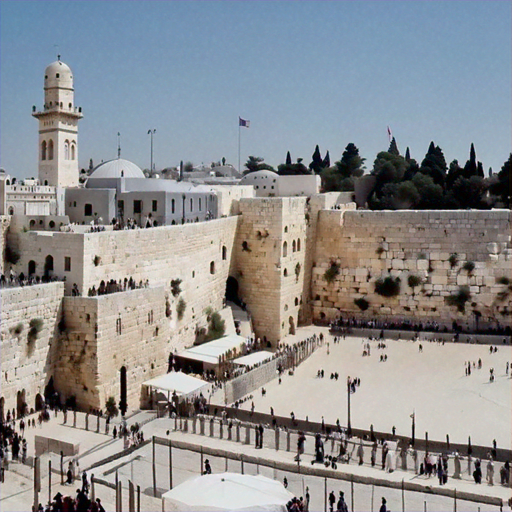

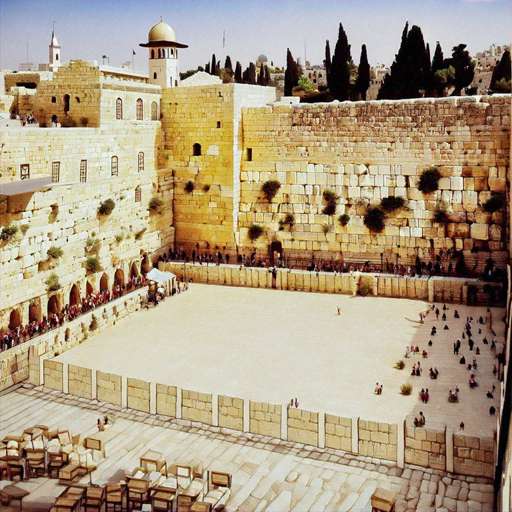

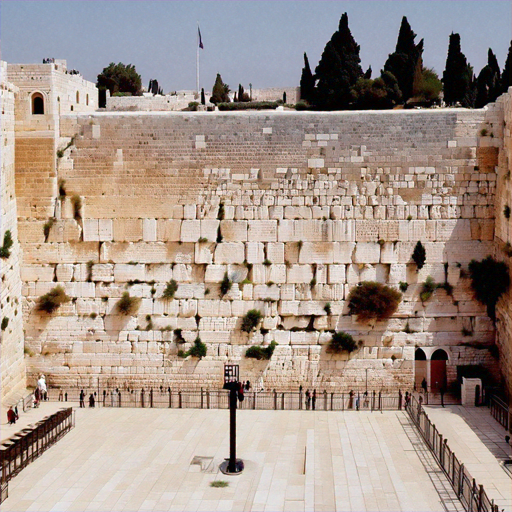

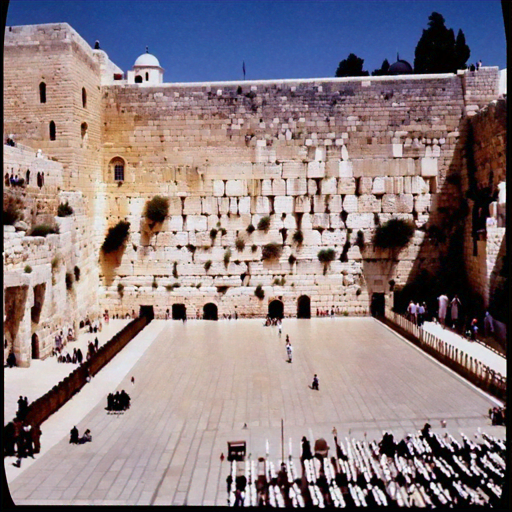

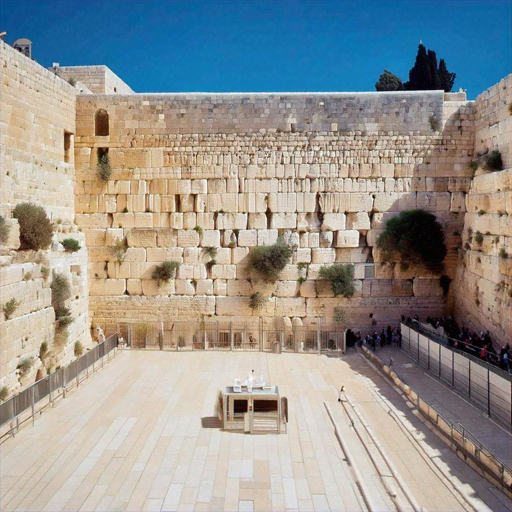

In [39]:
import json
import boto3
import uuid
from PIL import Image
from io import BytesIO
from base64 import b64encode
from base64 import b64decode
from IPython.display import display

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-image-generator-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Western wall in Israel as it looked like 1000 years ago.
"""
input = {
    "textToImageParams": {"text": prompt},
    "taskType": "TEXT_IMAGE",
    "imageGenerationConfig": {
        "cfgScale": 8,
        "seed": 0,
        "quality": "standard",
        "width": 512,
        "height": 512,
        "numberOfImages":5
    }
}
body = json.dumps(input) 
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response = json.loads(response.get('body').read())
images = response.get('images')
for image in images:
    current = Image.open(BytesIO(b64decode(image)))
    filename = str(uuid.uuid4()) + '.png'
    current.save(filename)
    display(Image.open(filename))


In [40]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'amazon.titan-text-lite-v1'
accept = 'application/json'
contentType = 'application/json'
prompt = """
Product: Sunglasses. 
Keywords: polarized, designer, comfortable, UV protection, aviators. 

Create a table that contains five variations of a detailed product description for the product listed above, each variation of the product description must use all the keywords listed.
"""
input = {
        'inputText': prompt,
        'textGenerationConfig': {
              'maxTokenCount': 4096,
              'stopSequences': [],
              'temperature': 0,
              'topP': 1
        }
    }
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
results = response_body['results']
for result in results:
    print(result['outputText'])


|Variation|Description|
|-|-|
|Polarized Sunglasses|Introducing our premium polarized sunglasses, the ultimate accessory for maximum visual clarity and protection. These stylish sunglasses feature high-quality lenses that eliminate glare and enhance color, making them ideal for outdoor activities such as driving, fishing, and sports. With a sleek and durable design, these sunglasses are perfect for anyone looking for both fashion and function.|
|Designer Sunglasses|Elevate your style with our exquisite collection of designer sunglasses. Crafted with precision and attention to detail, these sunglasses are the perfect blend of fashion and functionality. Choose from a variety of trendy designs, from classic aviators to bold cat-eye frames. Our sunglasses offer 100% UV protection, ensuring your eyes are shielded from harmful rays.|
|Comfortable Sunglasses|Say goodbye to discomfort and hello to our ultra-comfortable sunglasses. Engineered with a lightweight and ergonomic design, these sungl

In [41]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'anthropic.claude-v2'
prompt = """

Human: Please precisely copy any email addresses from the following text and then write them, one per line. Only write an email address if it's precisely spelled out in the input text. If there are no email addresses in the text, write "N/A". Do not say anything else. 
"Phone Directory:
John Latrabe, 800-232-1995, john909709@geemail.com
Josie Lana, 800-759-2905, josie@josielananier.com
Keven Stevens, 800-980-7000, drkevin22@geemail.com 
Phone directory will be kept up to date by the HR manager." 

Assistant:
"""
input = {
    'prompt': prompt,
    'max_tokens_to_sample': 2048, 
    'temperature': 0.5,
    'top_k': 250,
    'top_p': 1,
    'stop_sequences': []
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
completion = response_body['completion']
print(completion)


 john909709@geemail.com
josie@josielananier.com 
drkevin22@geemail.com


In [42]:
import json
import boto3

bedrock = boto3.client(
    service_name='bedrock-runtime'
)

modelId = 'anthropic.claude-v2'
prompt = """

Human: You are a customer service agent that is classifying emails by type. I want you to give your answer and then explain it. 
How would you categorize this email? 
<email>
Can I use my Mixmaster 4000 to mix paint, or is it only meant for mixing food?
</email> 

Categories are: 
(A) Pre-sale question 
(B) Broken or defective item 
(C) Billing question 
(D) Other (please explain)
 
Assistant: 
"""
input = {
    'prompt': prompt,
    'max_tokens_to_sample': 2048, 
    'temperature': 0.5,
    'top_k': 250,
    'top_p': 1,
    'stop_sequences': []
}
body=json.dumps(input)
response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept,contentType=contentType)
response_body = json.loads(response.get('body').read())
completion = response_body['completion']
print(completion)


 I would categorize this as (A) Pre-sale question.

Explanation: The email is asking if a particular product, the Mixmaster 4000, can be used for a specific purpose - mixing paint. The customer wants to know if the product is suitable for their needs before making a purchase. This is a common pre-sale question where a customer is inquiring about the capabilities and appropriate uses of a product. The email does not indicate anything is broken or defective, nor does it contain any billing questions. Therefore, I categorized it as a pre-sale question.
